## Running Three Attributes on our Full Dataset

We agreed to use three attributes: 

1. Energy Attribute
2. Similarity
3. Sobel filter (Edge Detection)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import bruges as bg
from PIL import Image
import os
from scipy.ndimage import generic_filter, sobel
import time

## Load Data. This is raw from the Kaggle. 

In [6]:
x = np.load('../../Data/np_array/x.npy')
y = np.load('../../Data/np_array/y.npy')

## Attribute Functions

In [3]:
def rms(data):
    data = np.asanyarray(data)
    return np.sqrt(np.sum(data**2) / data.size)

def attribute_wrapper(input_data, attribute_func, output_shape=None, **kwargs):
    image = np.reshape(input_data, newshape=(1, 101, 101))
    attribute = attribute_func(image, **kwargs)
    
    if output_shape is None:
        return np.reshape(attribute, input_data.shape)
    else:
        return np.reshape(attribute, output_shape)
    
def run_attributes(input_data):
    energy = attribute_wrapper(input_data, bg.attribute.energy, duration=5, dt=1)
    semb = attribute_wrapper(input_data, bg.attribute.similarity, duration=5, dt=1, step_out=3, kind='gst')
    sobel_image = sobel(input_data)

    return np.stack([input_data, energy, semb, sobel_image], axis=-1)


## Calculate Attributes and Stack onto last channel of input data

In [4]:
attributes = np.zeros(shape=(4000, 101, 101, 4), dtype=np.float32)

now= time.time()
for i in range(0, 4000):
    
    attributes[i] = run_attributes(x[i])
    
    if i%5 == 0:
        print(f'{i}th Image Complete in {(time.time() - now)/60} Minutes')
        

    


0th Image Complete in 0.023704683780670165 Minutes
5th Image Complete in 0.1397776405016581 Minutes
10th Image Complete in 0.25690497557322184 Minutes
15th Image Complete in 0.374451744556427 Minutes
20th Image Complete in 0.4926646629969279 Minutes
25th Image Complete in 0.6093847076098124 Minutes


/home/nathan/anaconda3/envs/hackathon/lib/python3.8/site-packages/bruges/attribute/discontinuity.py:77: RuntimeWarning: invalid value encountered in float_scalars
  return (eigs[0]-eigs[1]) / (eigs[0]+eigs[1])


30th Image Complete in 0.7259715914726257 Minutes
35th Image Complete in 0.8269947449366252 Minutes
40th Image Complete in 0.9438170750935873 Minutes
45th Image Complete in 1.061457594235738 Minutes
50th Image Complete in 1.1774165193239847 Minutes
55th Image Complete in 1.2943849245707193 Minutes
60th Image Complete in 1.4119289994239808 Minutes
65th Image Complete in 1.5297896146774292 Minutes
70th Image Complete in 1.6475859045982362 Minutes
75th Image Complete in 1.7654467741648356 Minutes
80th Image Complete in 1.8837034066518148 Minutes
85th Image Complete in 2.0019469976425173 Minutes
90th Image Complete in 2.1194258451461794 Minutes
95th Image Complete in 2.2373913248380024 Minutes
100th Image Complete in 2.355265772342682 Minutes
105th Image Complete in 2.4729027350743613 Minutes
110th Image Complete in 2.591243390242259 Minutes
115th Image Complete in 2.709831190109253 Minutes
120th Image Complete in 2.8276453415552774 Minutes
125th Image Complete in 2.945304854710897 Minutes

845th Image Complete in 19.60113218228022 Minutes
850th Image Complete in 19.71866363286972 Minutes
855th Image Complete in 19.83591407140096 Minutes
860th Image Complete in 19.953480645020804 Minutes
865th Image Complete in 20.070192778110503 Minutes
870th Image Complete in 20.18769609530767 Minutes
875th Image Complete in 20.305229500929514 Minutes
880th Image Complete in 20.422798200448355 Minutes
885th Image Complete in 20.540091915925345 Minutes
890th Image Complete in 20.657754993438722 Minutes
895th Image Complete in 20.7752933939298 Minutes
900th Image Complete in 20.89316127697627 Minutes
905th Image Complete in 21.009801097710927 Minutes
910th Image Complete in 21.126652995745342 Minutes
915th Image Complete in 21.243429740269978 Minutes
920th Image Complete in 21.36083701054255 Minutes
925th Image Complete in 21.47739782333374 Minutes
930th Image Complete in 21.594325276215873 Minutes
935th Image Complete in 21.711357847849527 Minutes
940th Image Complete in 21.8290577729543

1645th Image Complete in 38.22633791367213 Minutes
1650th Image Complete in 38.34400732517243 Minutes
1655th Image Complete in 38.46395469109218 Minutes
1660th Image Complete in 38.58286705414454 Minutes
1665th Image Complete in 38.70017685492834 Minutes
1670th Image Complete in 38.816790473461154 Minutes
1675th Image Complete in 38.935464680194855 Minutes
1680th Image Complete in 39.051871260007225 Minutes
1685th Image Complete in 39.16875680685043 Minutes
1690th Image Complete in 39.285336303710935 Minutes
1695th Image Complete in 39.40261335372925 Minutes
1700th Image Complete in 39.520119321346286 Minutes
1705th Image Complete in 39.63759600718816 Minutes
1710th Image Complete in 39.754698733488716 Minutes
1715th Image Complete in 39.8717113216718 Minutes
1720th Image Complete in 39.989031632741295 Minutes
1725th Image Complete in 40.10565902789434 Minutes
1730th Image Complete in 40.22378828128179 Minutes
1735th Image Complete in 40.34121840794881 Minutes
1740th Image Complete in 

2445th Image Complete in 56.65588398774465 Minutes
2450th Image Complete in 56.77306101322174 Minutes
2455th Image Complete in 56.88994203408559 Minutes
2460th Image Complete in 57.00679322083791 Minutes
2465th Image Complete in 57.107918961842856 Minutes
2470th Image Complete in 57.22463945945104 Minutes
2475th Image Complete in 57.34133379062017 Minutes
2480th Image Complete in 57.45789649883906 Minutes
2485th Image Complete in 57.574973531564076 Minutes
2490th Image Complete in 57.69198439915975 Minutes
2495th Image Complete in 57.80886545578639 Minutes
2500th Image Complete in 57.92541106144587 Minutes
2505th Image Complete in 58.042295340696974 Minutes
2510th Image Complete in 58.159539747238156 Minutes
2515th Image Complete in 58.27667725880941 Minutes
2520th Image Complete in 58.39376484553019 Minutes
2525th Image Complete in 58.51107431650162 Minutes
2530th Image Complete in 58.627377065022785 Minutes
2535th Image Complete in 58.7445345322291 Minutes
2540th Image Complete in 58

3250th Image Complete in 75.17601639827093 Minutes
3255th Image Complete in 75.29293545484543 Minutes
3260th Image Complete in 75.41015858252844 Minutes
3265th Image Complete in 75.52735385497411 Minutes
3270th Image Complete in 75.64432881673177 Minutes
3275th Image Complete in 75.76082806189855 Minutes
3280th Image Complete in 75.87755891084672 Minutes
3285th Image Complete in 75.99374932448069 Minutes
3290th Image Complete in 76.11097147067387 Minutes
3295th Image Complete in 76.22775369882584 Minutes
3300th Image Complete in 76.34472486575444 Minutes
3305th Image Complete in 76.46075076659521 Minutes
3310th Image Complete in 76.57838217020034 Minutes
3315th Image Complete in 76.69543062051137 Minutes
3320th Image Complete in 76.81240182320276 Minutes
3325th Image Complete in 76.92955499092737 Minutes
3330th Image Complete in 77.03028506835302 Minutes
3335th Image Complete in 77.14808830022812 Minutes
3340th Image Complete in 77.26499377091726 Minutes
3345th Image Complete in 77.382

TypeError: _save_dispatcher() missing 1 required positional argument: 'arr'

In [8]:
np.save('attributes_0-4000', attributes)

## Discard Entries Giving Nans and resize to 64x64

In [32]:
attributes.shape

(4000, 101, 101, 4)

In [21]:
from skimage.transform import resize

In [44]:
attributes_x_reshaped = np.zeros(shape=(3747, 64, 64, 4), dtype=np.float32)
attributes_y_reshaped = np.zeros(shape=(3747, 64, 64, 1), dtype=np.float32)

j=0
k=0
for i in range(attributes.shape[0]):
    if (np.isnan(attributes[i]).any()):
        j+=1
    else:
        attributes_x_reshaped[k] = resize(attributes[i], (64, 64, 4), anti_aliasing=True)
        attributes_y_reshaped[k] = resize(y[i], (64, 64, 1), anti_aliasing=True)
        k+=1
        
    if i % 100 == 0:
        print(i)
        


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900


## QC Plot

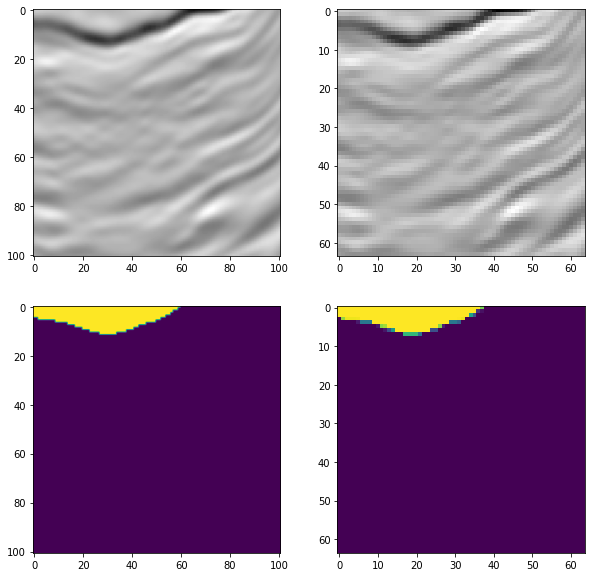

In [51]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,2, figsize=(10,10))
axes[0, 0].imshow(attributes[0, :, :, 0], cmap='gray')
axes[1, 0].imshow(y[0, :, :])
axes[0, 1].imshow(attributes_x_reshaped[0, :, :, 0], cmap='gray')
axes[1, 1].imshow(attributes_y_reshaped[0, :, :, 0])

In [52]:
np.save('attributes_x_64x64' ,attributes_x_reshaped)
np.save('y_64x64' ,attributes_y_reshaped)